# Boundary value problem

### In general case:

$L[y]=y''+p(x)y+q(x)y=f(x)$

$l_a[y]=\alpha_0y(a)+\alpha_1y'(a)=A$

$l_b[y]=\beta_0y(b)+\beta_1y'(b)=B$

for $x\in[a,b]$

## 1. Consider the following boundary value problem:

$\frac{d^2y}{dx^2}-\frac{dy}{dx}\ln(x)-2y=1$ for $x \in [0.5,1.5]$

### with the boundary conditions:

$y(0.5)+y'(0.5)=1$, $y(1.5)-y'(1.5)=0$

1.1. Solve this problem using finite difference method of the second order. Use the uniform grid. Is this method stable for step size $h=0.125$? Find number of grid points required to achieve accuracy of the order of 1e-6.

### *Don't forget to include the boundary conditions!*

1.2. Use the first order one-sided numerical approximation for the first derivative and write a new scheme. Find number of grid points required to achieve accuracy of the order of 1e-6.

1.3. Plot the solutions of both methods on the same figure. Compare results and discuss differences (if occurs).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

#1.1.
def SecondOrderScheme(a,b,A,B,alpha,beta,P,Q,f,N=100):
    # in:
    # a,b - float, limits of x, N - int, number of dots points
    # A,B - float, boundary values
    # alpha, beta - array of float, coefficients for boundary conditions in general case
    # P(x), Q(x), f(x) - functions from general equation
    
    #you can construct matrix of the system and use scipy.linalg.solve method to solve it: y=solve(M,f)
    
    # out: 
    # y - array of float, solution of the BVP
    
    dots = np.linspace(a, b, N)
    h = dots[1] - dots[0]
    
    r = np.array([f(i) for i in dots]) 
    p = np.array([P(i) for i in dots]) 
    q = np.array([Q(i) for i in dots]) 
    
    r[0] = A
    r[-1] = B  
    
    M = np.zeros((N,N))
    
    
    
    for i in range(1, N-1):
        
        M[i, i-1] = 1 / h**2 - p[i] / (2 * h)
        M[i, i] = - 2 / h**2 + q[i]             
        M[i, i+1] = 1 / h**2 + p[i] / (2 * h)
    
    M[0, 0] = alpha[0] - 1.5 * alpha[1] / h  
    M[0, 1] = 2 * alpha[1] / h
    M[0, 2] = - 0.5 * alpha[1] / h
    
    M[-1, -1] = beta[0] - 1.5 * beta[1] / (- h)    
    M[-1, -2] = 2 * beta[1] / (- h)
    M[-1, -3] = -0.5 * beta[1] / (- h)
    
    y = solve(M, r)
    
    return y

#1.2.
def FirstOrderScheme(a,b,A,B,alpha,beta,P,Q,f,N=100):
    # in:
    # a,b - float, limits of x, N - int, number of dots points
    # A,B - float, boundary values
    # alpha, beta - array of float, coefficients for boundary conditions in general case
    # p(x), g(x), f(x) - functions from general equation
    
    #you can construct matrix of the system and use scipy.linalg.solve method to solve it: y=solve(M,f)
    
    # out: 
    # y - array of float, solution of the BVP
    
    dots = np.linspace(a, b, N)
    h = dots[1] - dots[0]
    
    r = np.array([f(i) for i in dots]) 
    p = np.array([P(i) for i in dots]) 
    q = np.array([Q(i) for i in dots]) 
    
    r[0] = A
    r[-1] = B  
    
    M = np.zeros((N,N))
    
    
    
    for i in range(1, N-1):
        
        M[i, i-1] = 1 / h**2
        M[i, i] = - 2 / h**2 + q[i] - p[i] / h  
        M[i, i+1] = 1 / h**2 + p[i] / h
    
    M[0, 0] = alpha[0] - alpha[1] / h  
    M[0, 1] = alpha[1] / h
    
    M[-1, -1] = beta[0] - beta[1] / (- h)  
    M[-1, -2] = beta[1] / (- h)
    
    y = solve(M, r)
    
    return y

In [2]:
def p(x):
    
    return -np.log(x)

def q(x):
    
    return - 2 * np.ones_like(x)

def f(x):
    
    return np.ones_like(x)


<Figure size 504x504 with 0 Axes>

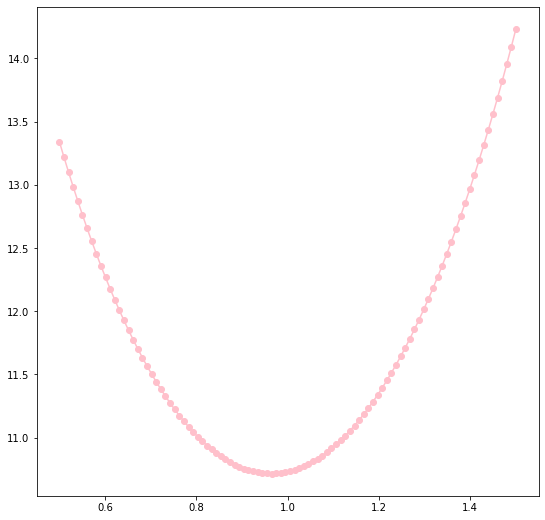

In [3]:
plt.figure(figsize = (7,7))

N = 100
xx = np.linspace(1/2, 3/2, N)
yy = SecondOrderScheme(1/2, 3/2, 1, 0, [1,1], [1,-1],p,q,f,N) 

plt.figure(figsize=(9,9))
plt.plot(xx, yy, 'o-', color = 'pink')
 #stable


In [10]:

a = 0.5
b = 1.5
A = 1.
B = 0.
alpha = [1., 1.]
beta = [1., -1.]


def accurac(meth, a, b, A, B, alpha, beta, p, q, f, eps):
    
    N = 100
    res = meth(a,b,A,B,alpha,beta,p,q,f,N)
    
    while True:
        N = 2 * N - 1
        temp = meth(a,b,A,B,alpha,beta,p,q,f,N)
        if np.max (abs(temp[::2] - res[:]))  < eps:
            break
            
        res = temp
    return N



res1 = accurac(FirstOrderScheme, a, b, A, B, alpha, beta, p, q, f, eps = 7*1e-2)
res2 = accurac(SecondOrderScheme, a, b, A, B, alpha, beta, p, q, f, eps = 1e-2)
print( 'FirstOrderScheme', res1, '\n', 'SecondOrderScheme', res2)



FirstOrderScheme 6337 
 SecondOrderScheme 397


<Figure size 504x504 with 0 Axes>

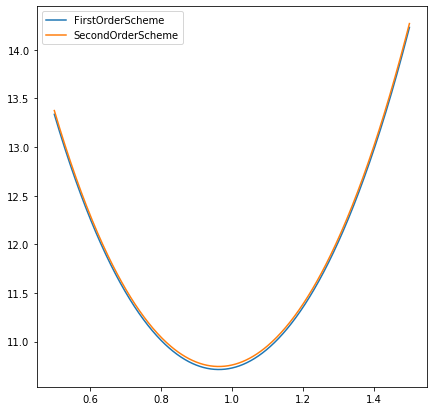

In [11]:
plt.figure(figsize = (7,7))

one = np.linspace(a, b, res1)
two = np.linspace(a, b, res2)

plt.figure(figsize = (7,7))

res1 = FirstOrderScheme(a, b, A, B, alpha, beta, p, q, f, res1)
res2 = SecondOrderScheme(a, b, A, B, alpha, beta, p, q, f, res2)

plt.plot( one, res1, label = 'FirstOrderScheme' )
plt.plot( two, res2, label = 'SecondOrderScheme' )
plt.legend()

#в целом на одинаковых решетках квадратичная схема лучше

# 2. Consider the following boundary value problem:

$\frac{d^2y}{dx^2}+2\frac{dy}{dx}-3xy=\frac{2-8x}{x^3}$ for $x \in [1,2]$

### with the boundary conditions:

$y(1)=1$, $y(2)=0.5$

2.1. Solve this problem using finite difference method of the second order. Find number of grid points required to achieve accuracy of the order of 1e-6.

2.2. Solve this problem using Galerkin method with power basis functions. Find number of grid points required to achieve accuracy of the order of 1e-6.

2.3. Plot the solutions of both methods on the same figure. Compare results and discuss differences (if occurs).

In [ ]:

a = 1.
b = 2.
A = 1.
B = 0.5
alpha = [0., 1.]
beta = [0., 1.]

def p1(x):
    return 2*np.ones_like(x)
def q1(x):
    return -3*x
def f1(x):
    return (2-8*x)/x**3



while(True):
    
    y = SecondOrderScheme(a,b,A,B,alpha,beta,p,q,f,N)

    yn = SecondOrderScheme(a,b,A,B,alpha,beta,p,q,f, 2 * N - 1) 